# Military Expenditure, GDP, and Population 
## Author: Mary Gibbs
### The objective of this project is to perform data mining and examine relationships among military expenditure, GDP, and population for 10 countries (US, China, Russia, Germany, UK, France, Italy, Iran, Israel, and Saudi Arabia) from 2010-2016. The data for this project comes from the SIPRI Military Expenditure Database (https://www.sipri.org/databases/milex).

## 1) Import packages

In [1]:
#import packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

## 2) Read in data

In [2]:
#check working directory
os.getcwd()

'/Users/mgibbs/Documents/GitHub/Python/military_expenditure'

In [3]:
#read in data 
#military expendinture in constant 2016 USD (millions)
me = pd.read_excel('military_expenditure_raw_data.xlsx', sheetname = 'Constant (2016) USD', skiprows = 4, index_col = 0, header = 1)
#military expenditure as percentage of GDP
me_gdp = pd.read_excel('military_expenditure_raw_data.xlsx', sheetname = 'Share of GDP', skiprows = 4, index_col = 0, header = 1)
#military expenditure per capita in current USD
me_pc = pd.read_excel('military_expenditure_raw_data.xlsx', sheetname = 'Per capita', skiprows = 5, index_col = 0, header = 1)
#military expenditure in current USD (millions)
me_cur = pd.read_excel('military_expenditure_raw_data.xlsx', sheetname = 'Current USD', skiprows = 4, index_col = 0, header = 1)

In [4]:
#view first and last 5 rows of me 
#me.head()
#me.tail()

In [5]:
#view first and last 5 rows of me_gdp 
#me_gdp.head()
#me_gdp.tail()
#reads in as decimal

In [6]:
#view first and last 5 rows of me_pc 
#me_pc.head()
#me_pc.tail()

In [7]:
#view first and last 5 rows of me_cur 
#me_cur.head() 
#me_cur.tail()

## 3) Clean data

In [8]:
#get countries of interest as indices 
coi = ['USA', 'China, P.R.', 'Russian Federation', 'Germany', 'UK', 'France', 'Italy', 'Iran', 'Israel', 'Saudi Arabia']
me_sub = me.loc[coi]
me_gdp_sub = me_gdp.loc[coi]
me_pc_sub = me_pc.loc[['USA', 'China, P.R.', 'USSR/Russia', 'Germany', 'UK', 'France', 'Italy', 'Iran', 'Israel', 'Saudi Arabia']]
me_cur_sub = me_cur.loc[coi]
#rename USSR/Russia index Russian Federation
me_pc_sub = me_pc_sub.rename(index = {'USSR/Russia': 'Russian Federation'})

In [9]:
#get 2010-2016 as columns 
me_sub = me_sub.iloc[:, 63:70]
me_gdp_sub = me_gdp_sub.iloc[:, 62:69]
me_pc_sub = me_pc_sub.iloc[:, 23:30]
me_cur_sub = me_cur_sub.iloc[:, 62:69]

In [10]:
#change data type to float
col = me_sub.columns.tolist()
me_sub = me_sub[col].apply(pd.to_numeric)
me_gdp_sub = me_gdp_sub[col].apply(pd.to_numeric)
me_pc_sub = me_pc_sub[col].apply(pd.to_numeric)
me_cur_sub = me_cur_sub[col].apply(pd.to_numeric)

In [11]:
#round military expenditure in constant 2016 USD (millions) to 2 decimals
me_sub = me_sub.round(2)

In [12]:
#calculate GDP in constant 2016 USD (millions)
gdp_sub = me_sub/me_gdp_sub
#round GDP in constant 2016 USD (millions) to 2 decimals
gdp_sub = gdp_sub.round(2)

In [13]:
#calculate population (millions)
pop_sub = me_cur_sub/me_pc_sub
#round population (millions) to 2 decimals
pop_sub = pop_sub.round(2)

In [14]:
#insert measurement column
me_sub.insert(loc = 0, column = 'Measurement', value = 'military expenditure')
gdp_sub.insert(loc = 0, column = 'Measurement', value = 'GDP')
pop_sub.insert(loc = 0, column = 'Measurement', value = 'population')

In [15]:
#append gdp_sub and pop_sub to me_sub
df = me_sub
df = df.append(gdp_sub)
df = df.append(pop_sub)

In [16]:
#rename China, P.R. index China, Russian Federation index Russia, USA index US
df = df.rename(index = {'China, P.R.': 'China'})
df = df.rename(index = {'Russian Federation': 'Russia'})
df = df.rename(index = {'USA': 'US'})

In [17]:
#view first five rows of df
df.head()

,Measurement,2010,2011,2012,2013,2014,2015,2016
Country,,,,,,,,
US,military expenditure,768465.84,758988.40,715838.25,659063.64,618341.22,603624.99,600106.44
China,military expenditure,138028.43,149022.40,161796.90,176859.92,191917.40,204505.14,216031.28
Russia,military expenditure,43120.56,46022.11,53317.45,55922.08,59929.44,64592.96,69245.31
Germany,military expenditure,41488.24,40301.43,41262.50,38880.71,38705.07,39892.47,41579.49
UK,military expenditure,57087.68,54677.21,52347.27,50136.00,48829.59,47872.98,48118.94


In [18]:
#view last five rows of df
df.tail()

,Measurement,2010,2011,2012,2013,2014,2015,2016
Country,,,,,,,,
France,population,63.03,63.34,63.64,63.92,64.19,64.46,64.72
Italy,population,59.73,59.76,59.73,59.67,59.59,59.50,59.43
Iran,population,74.57,75.49,76.45,77.44,78.41,79.36,80.28
Israel,population,7.43,7.57,7.70,7.82,7.94,8.06,8.19
Saudi Arabia,population,27.43,28.24,29.09,29.94,30.78,31.56,32.28


In [19]:
#write out df to CSV file
df.to_csv('military_expenditure_clean_data.csv')

## 4) Plot each measurement

In [20]:
#select each measurement
df_me_plt = df.loc[df['Measurement'] == 'military expenditure']
df_gdp_plt = df.loc[df['Measurement'] == 'GDP']
df_pop_plt = df.loc[df['Measurement'] == 'population']

In [21]:
#create bar plot function
def bar_plt(df, stacked, colormap, title, xlabel, ylabel, legend_title, axhline = False, save = False):
    """
    Create a bar plot from a data frame
    
    Args:
        df (DataFrame): data frame 
        stacked (bool): stacked bar plot
        colormap (str): colors (https://matplotlib.org/users/colormaps.html)
        title (str): bar plot title
        xlabel (str): x-axis label
        ylabel (str): y-axis label
        legend_title (str): legend title
        axhline (bool): black horizontal line across x-axis, defaults to False
        save (bool): save bar plot as PNG file to working directory, defaults to False
    
    Returns:
        bar plot
    """
    fig = plt.figure()
    df.plot(kind = 'bar', figsize = (15, 6), stacked = stacked, colormap = colormap)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(title = legend_title, loc = 'center left', bbox_to_anchor = (1.0, 0.5))
    if axhline == True:
        plt.axhline(y = 0, color = 'black')
    if save == True:
        plt.savefig(title + '.png', bbox_inches = "tight")
    return plt.show()

In [22]:
#create line plot function
def line_plt(df, colormap, title, xlabel, ylabel, legend_title, axhline = False, save = False):
    """
    Create a line plot from a data frame
    
    Args:
        df (DataFrame): data frame 
        colormap (str): colors (https://matplotlib.org/users/colormaps.html)
        title (str): line plot title
        xlabel (str): x-axis label
        ylabel (str): y-axis label
        legend_title (str): legend title
        axhline (bool): black horizontal line across x-axis, defaults to False
        save (bool): save line plot as PNG file to working directory, defaults to False
    
    Returns:
        line plot
    """
    fig = plt.figure()
    df.plot(kind = 'line', figsize = (15, 6), colormap = colormap)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(title = legend_title, loc = 'center left', bbox_to_anchor = (1.0, 0.5))
    if axhline == True:
        plt.axhline(y = 0, color = 'black')
    if save == True:
        plt.savefig(title + '.png', bbox_inches = "tight")
    return plt.show()

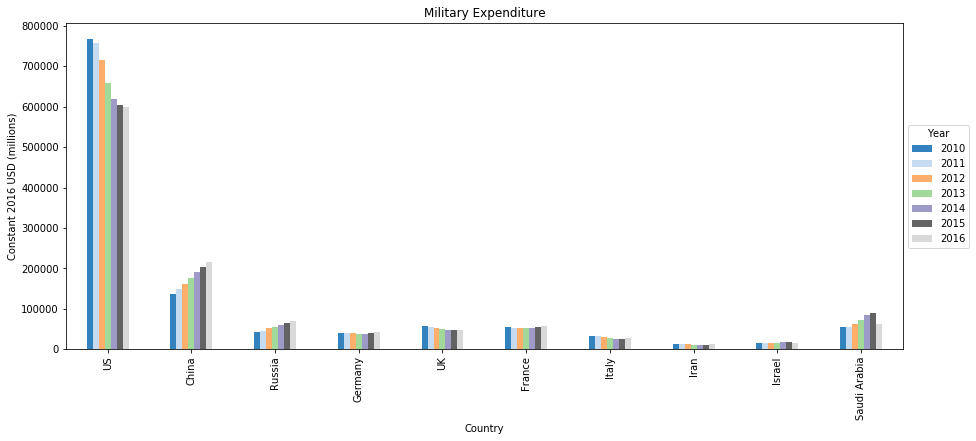

In [23]:
#plot military expenditure
bar_plt(df = df_me_plt, stacked = False, colormap = 'tab20c', title = 'Military Expenditure', xlabel = 'Country', 
        ylabel = 'Constant 2016 USD (millions)', legend_title = 'Year', save = True)

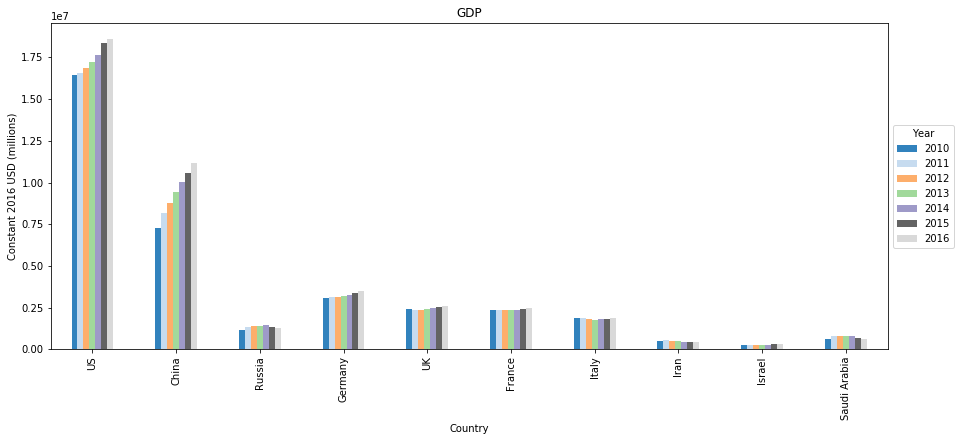

In [24]:
#plot GDP
bar_plt(df = df_gdp_plt, stacked = False, colormap = 'tab20c', title = 'GDP', xlabel = 'Country', 
        ylabel = 'Constant 2016 USD (millions)', legend_title = 'Year', save = True)

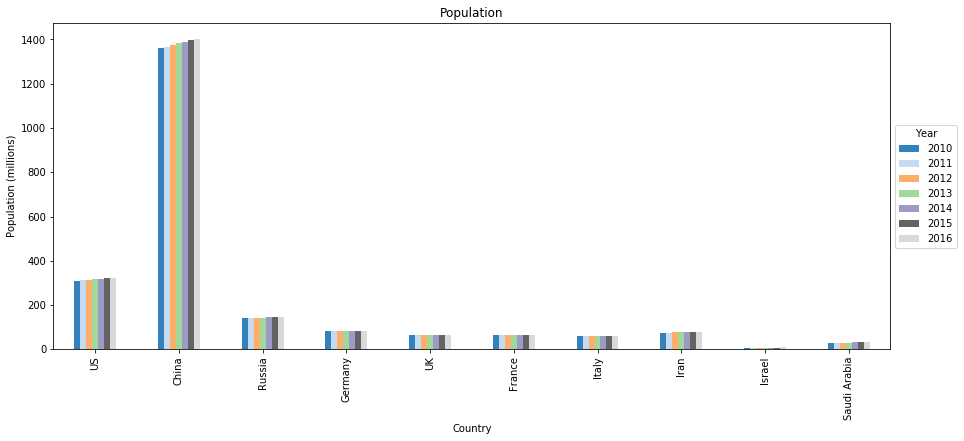

In [25]:
#plot population
bar_plt(df = df_pop_plt, stacked = False, colormap = 'tab20c', title = 'Population', xlabel = 'Country', 
        ylabel = 'Population (millions)', legend_title = 'Year', save = True)

## 5) Compare each country's military expenditure and total military expenditure

In [26]:
#for each year, calculate each country's military expenditure as a percentage of total military expenditure 
df_me = df_me_plt.iloc[:, 1:]
df_me_tot = df_me.sum(axis = 0)
df_me_per_tot = (df_me/df_me_tot)*100
#view first five rows of df_me_per_tot
df_me_per_tot.head()

,2010,2011,2012,2013,2014,2015,2016
Country,,,,,,,
US,63.018100,62.300771,59.709738,56.776309,53.774203,52.076836,52.121291
China,11.319032,12.232348,13.495857,15.235939,16.690146,17.643373,18.763054
Russia,3.536105,3.777677,4.447333,4.817516,5.211779,5.572660,6.014191
Germany,3.402246,3.308101,3.441801,3.349454,3.365996,3.441663,3.611321
UK,4.681480,4.488122,4.366408,4.319062,4.246478,4.130169,4.179294


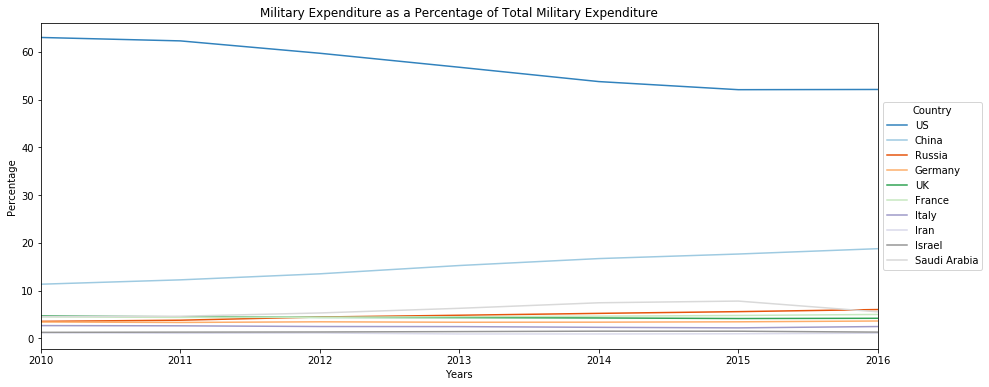

In [27]:
#plot each country's military expenditure as a percentage of total military expenditure
df_me_per_tot_trans = df_me_per_tot.transpose()
line_plt(df = df_me_per_tot_trans, colormap = 'tab20c', title = 'Military Expenditure as a Percentage of Total Military Expenditure', 
        xlabel = 'Years', ylabel = 'Percentage', legend_title = 'Country', axhline = False, save = True)

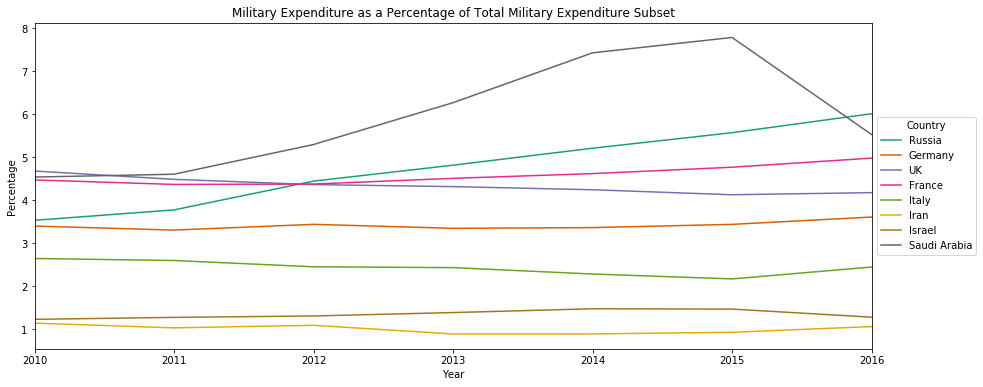

In [28]:
#plot subset of each country's military expenditure as a percentage of total military expenditure
df_me_per_tot_trans_1 = df_me_per_tot_trans.iloc[:, 2:]
line_plt(df = df_me_per_tot_trans_1, colormap = 'Dark2', title = 'Military Expenditure as a Percentage of Total Military Expenditure Subset', 
        xlabel = 'Year', ylabel = 'Percentage', legend_title = 'Country', save = True)

## 6) Fastest growing countries in military expenditure in value

In [29]:
#calculate military expenditure value change
df_me_vc = pd.DataFrame(index = df_me_plt.index)
for i in range(len(df_me_plt.columns) - 2):
    df_me_vc[str(df_me_plt.columns[i + 1]) + '-' + str(df_me_plt.columns[i + 2])] = df_me_plt.iloc[:, i + 2] - df_me_plt.iloc[:, i + 1]
#view first five rows of df_me_vc 
df_me_vc.head()

,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016
Country,,,,,,
US,-9477.44,-43150.15,-56774.61,-40722.42,-14716.23,-3518.55
China,10993.97,12774.50,15063.02,15057.48,12587.74,11526.14
Russia,2901.55,7295.34,2604.63,4007.36,4663.52,4652.35
Germany,-1186.81,961.07,-2381.79,-175.64,1187.40,1687.02
UK,-2410.47,-2329.94,-2211.27,-1306.41,-956.61,245.96


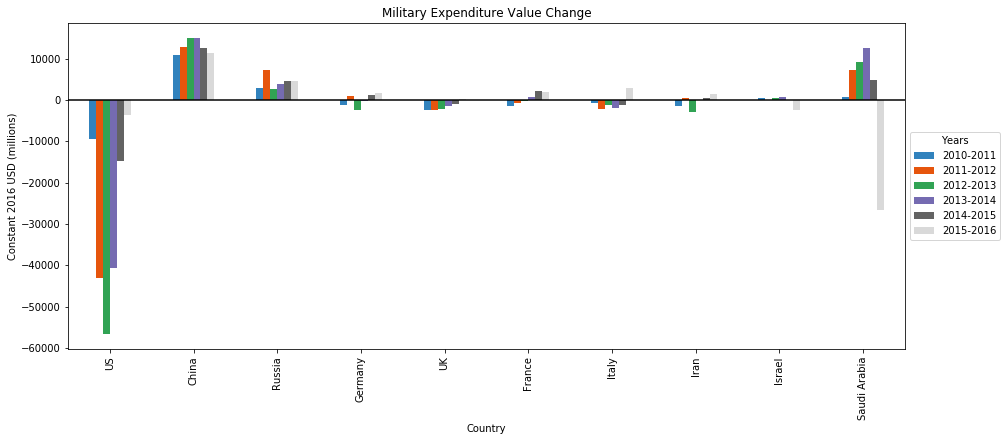

In [30]:
#plot military expenditure value change
bar_plt(df = df_me_vc, stacked = False, colormap = 'tab20c', title = 'Military Expenditure Value Change', 
        xlabel = 'Country', ylabel = 'Constant 2016 USD (millions)', legend_title = 'Years', axhline = True, save = True)

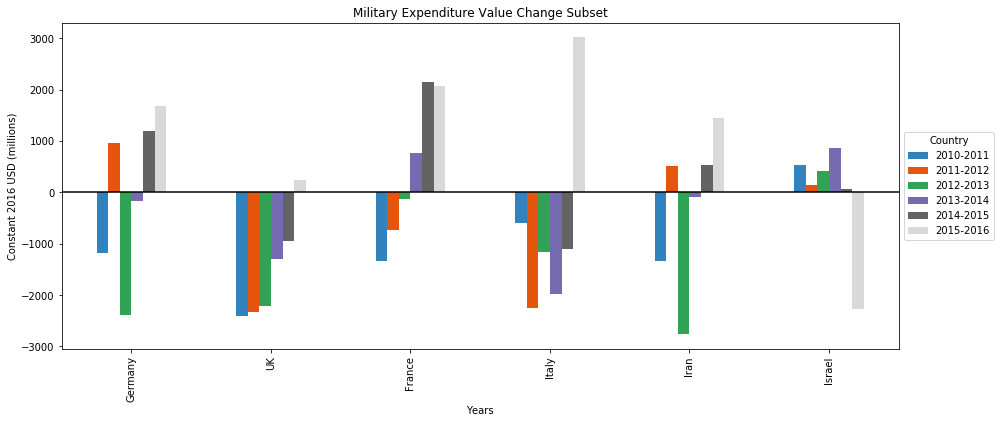

In [31]:
#plot subset of military expenditure value change
df_me_vc_1 = df_me_vc.iloc[[3, 4, 5, 6, 7, 8], :]
bar_plt(df = df_me_vc_1, stacked = False, colormap = 'tab20c', title = 'Military Expenditure Value Change Subset', 
        xlabel = 'Years', ylabel = 'Constant 2016 USD (millions)', legend_title = 'Country', axhline = True, save = True)

## 7) Fastest growing countries in military expenditure in percentage

In [32]:
#calculate military expenditure percentage change
df_me_pc = pd.DataFrame(index = df_me_plt.index)
for i in range(len(df_me_plt.columns) - 2):
    df_me_pc[str(df_me_plt.columns[i + 1]) + '-' + str(df_me_plt.columns[i + 2])] = ((df_me_plt.iloc[:, i + 2] - df_me_plt.iloc[:, i + 1])/df_me_plt.iloc[:, i + 1])*100
#view first five rows of df_me_pc
df_me_pc.head()

,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016
Country,,,,,,
US,-1.233294,-5.685219,-7.931207,-6.178830,-2.379953,-0.582903
China,7.965004,8.572201,9.309832,8.513789,6.558936,5.636113
Russia,6.728925,15.851816,4.885136,7.165971,7.781685,7.202565
Germany,-2.860594,2.384704,-5.772287,-0.451741,3.067815,4.228918
UK,-4.222400,-4.261264,-4.224232,-2.605732,-1.959079,0.513776


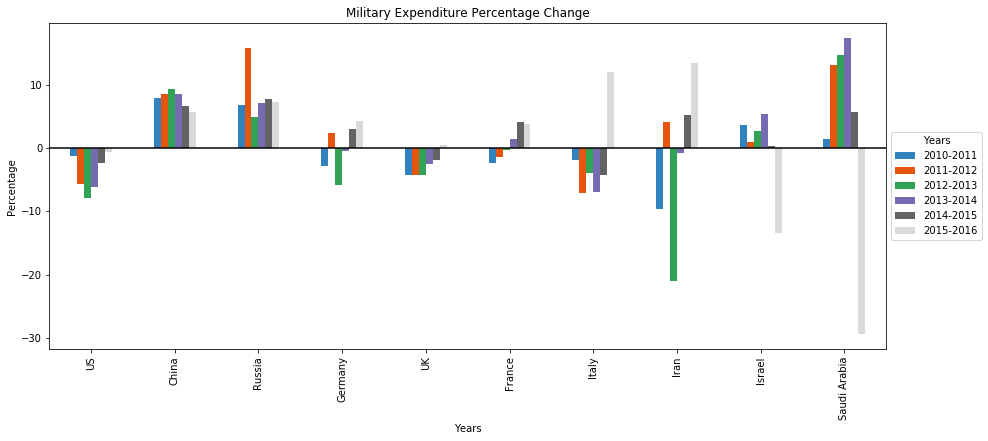

In [33]:
#plot military expenditure percentage change
bar_plt(df = df_me_pc, stacked = False, colormap = 'tab20c', title = 'Military Expenditure Percentage Change', 
        xlabel = 'Years', ylabel = 'Percentage', legend_title = 'Years', axhline = True, save = True)

## 8) Compare military expenditure and GDP

In [34]:
#calculate military expenditure as a percentage of GDP
df_me_per_gdp = (df_me_plt.iloc[:, 1:]/df_gdp_plt.iloc[:, 1:])*100
#view first five rows of df_me_per_gdp 
df_me_per_gdp.head()

,2010,2011,2012,2013,2014,2015,2016
Country,,,,,,,
US,4.665606,4.583984,4.238733,3.832514,3.499702,3.289634,3.222135
China,1.896713,1.821927,1.838564,1.872334,1.915341,1.934922,1.930606
Russia,3.816230,3.456960,3.751336,3.944127,4.104184,4.851342,5.503756
Germany,1.353651,1.281112,1.311261,1.223994,1.184974,1.179472,1.195846
UK,2.390554,2.310253,2.210718,2.090884,1.972134,1.882575,1.838682


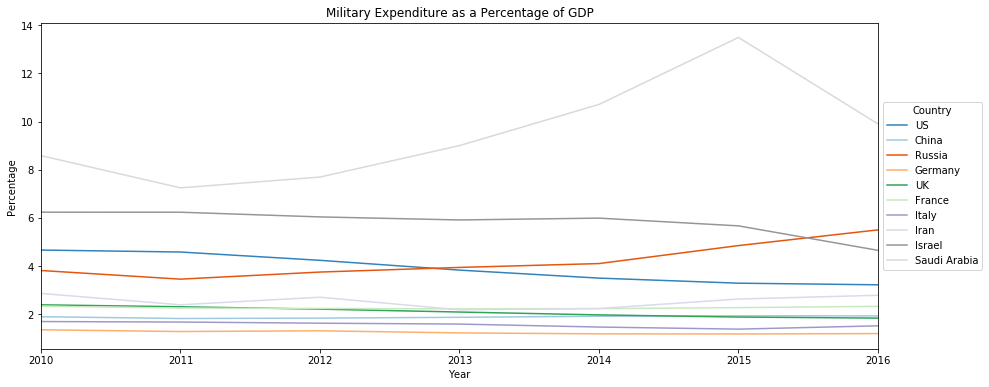

In [35]:
#plot military expenditure as percentage of GDP
df_me_per_gdp_trans = df_me_per_gdp.transpose()
line_plt(df = df_me_per_gdp_trans, colormap = 'tab20c', title = 'Military Expenditure as a Percentage of GDP', 
        xlabel = 'Year', ylabel = 'Percentage', legend_title = 'Country', save = True)

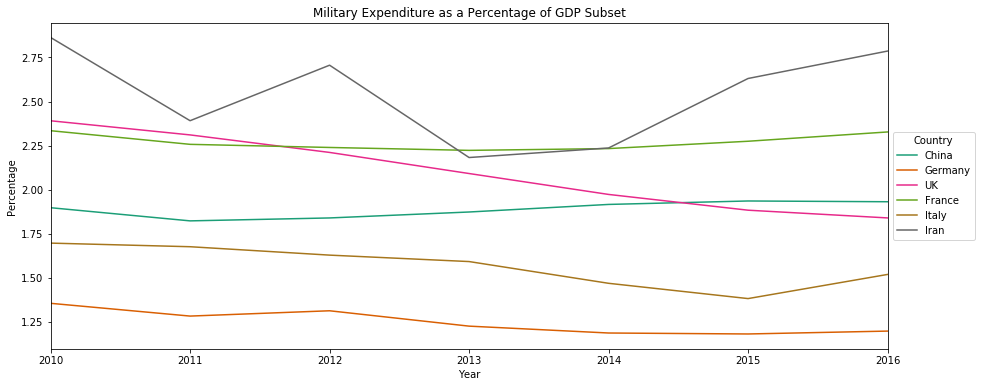

In [36]:
#plot subset of military expenditure as percentage of GDP
df_me_per_gdp_trans_1 = df_me_per_gdp.transpose().iloc[:, [1, 3, 4, 5, 6, 7]]
line_plt(df = df_me_per_gdp_trans_1, colormap = 'Dark2', title = 'Military Expenditure as a Percentage of GDP Subset', 
        xlabel = 'Year', ylabel = 'Percentage', legend_title = 'Country', save = True)

## 9) Compare military expenditure per person and GDP per person

In [37]:
#from 2010-2016, calculate average military expenditure per person and average GDP per person
df_pp = pd.DataFrame(index = df_me_plt.index)
df_me_pp = df.iloc[0:10, 1:]/df.iloc[20:, 1:]
df_pp['Average Military Expenditure per Person (2010-2016)'] = df_me_pp.mean(axis = 1)
df_gdp_pp = df.iloc[10:20, 1:]/df.iloc[20:, 1:]
df_pp['Average GDP per Person (2010-2016)'] = df_gdp_pp.mean(axis = 1)
#view first five rows of df_pp
df_pp.head()

,Average Military Expenditure per Person (2010-2016),Average GDP per Person (2010-2016)
Country,,
US,2142.674808,55109.193142
China,127.772502,6758.545219
Russia,390.063231,9302.824375
Germany,495.582150,39798.169885
UK,794.764625,37928.785346


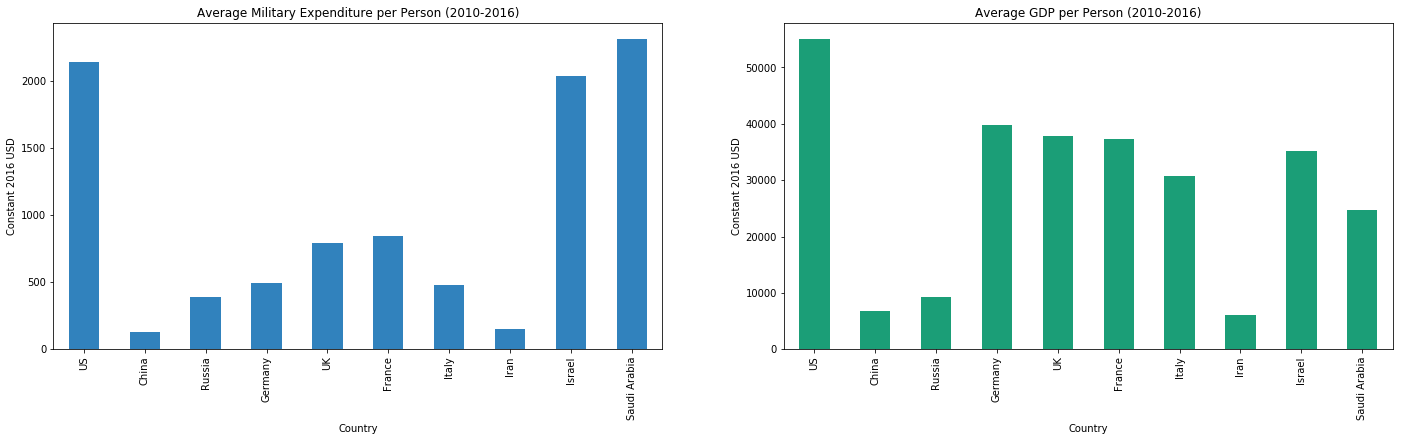

In [38]:
#plot average military expenditure per person (2010-2016) and average GDP per person (2010-2016)
fig, axes = plt.subplots(nrows = 1, ncols = 2, sharex = True)
df_pp['Average Military Expenditure per Person (2010-2016)'].plot(kind = 'bar', figsize = (14, 12), colormap = 'tab20c', legend = False, ax = axes[0])
axes[0].set_title('Average Military Expenditure per Person (2010-2016)')
axes[0].set_ylabel('Constant 2016 USD')
df_pp['Average GDP per Person (2010-2016)'].plot(kind = 'bar', figsize = (24, 6), colormap = 'Dark2', legend = False, ax = axes[1])
axes[1].set_title('Average GDP per Person (2010-2016)')
axes[1].set_ylabel('Constant 2016 USD')
fig.savefig('Average Military Expenditure per Person (2010-2016) and Average GDP per Person (2010-2016).png', bbox_inches = "tight")
plt.show()